In [53]:
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tkinter as tk
from tkinter import Text, Label, Button, messagebox
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.linear_model import LogisticRegression
from tkinter import scrolledtext
from tqdm import tqdm
import tkinter as tk
from tkinter import ttk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import GridSearchCV
import joblib
pd.set_option('display.max_colwidth', None)
import os
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import normalize

In [2]:
# Get the number of available processors
num_processors = os.cpu_count()
print(num_processors)
n_jobs = max(1, num_processors - 5)
print(n_jobs)
#8 processors in use

12
7


In [3]:
#data = pd.read_csv("blending/preprocessedFIL.csv", delimiter=',')
data = pd.read_csv("Combined Total - Preprocessed (Labeled).csv", delimiter=',' )

label_counts = data['label'].value_counts()
print(label_counts)
data

0    10159
1     8679
Name: label, dtype: int64


,text,label,language
0,gastos ni sa political ads halos p na inaasahan na ni na may mga taong,0,English
1,tang ina tuwid na daan daw eh sya nga di straight,1,English
2,salamat sa walang sawang suporta ng mga taga makati ang pagbabalik in makati,0,Filipino
3,putangina mo takbo pa,1,Filipino
4,with selective amnesia forgetting about the past six years he spent preparing to be,0,English
...,...,...,...
18833,if hoe is talking to your man she is not the problem he is the fact that hoes feel welcomed reflects on how he acts behi,1,English
18834,sounds like bad bitch,1,English
18835,is that all pussy bitch,1,English
18836,seen scooby hoe some niggas at the gardens too,1,English


## Feature Extraction

In [1]:
min_df_value = 3 # set to 2: sets the minimum frequency required for a term to be considered
tfidf_vectorizer = TfidfVectorizer(min_df=min_df_value, ngram_range=(1,1), max_df=50) # 2,2= Bigram
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_df


NameError: name 'TfidfVectorizer' is not defined

In [67]:
# Sum the TF-IDF scores for each term across all documents
tfidf_scores = X_tfidf.sum(axis=0)

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names()

# Create a DataFrame to store the TF-IDF scores with their corresponding terms
top_tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names).transpose()

# Sort the DataFrame by TF-IDF scores in descending order
top_tfidf_df = top_tfidf_df.sort_values(by=0, ascending=False)

# Print the top TF-IDF values
print("Top TF-IDF values:")
print(top_tfidf_df.head(10))

Top TF-IDF values:
                       0
fag            49.507624
tsk            47.520871
annoying       44.958736
pagbabago      43.889578
nancy          43.765781
stupid         40.233324
advertisement  40.059158
call           39.489438
iboto          39.202389
hoe            38.803640


Top 10 TF-IDF values:
epal       1.0
gaming     1.0
hahahah    1.0
typical    1.0
stupid     1.0
math       1.0
grabe      1.0
gook       1.0
coons      1.0
miriam     1.0
dtype: float64


In [5]:
result_df = pd.concat([data['text'], tfidf_df, data['label']], axis=1)
result_df.columns = ['text'] + list(tfidf_df.columns) + ['label']


result_df

,text,aa,aahon,aalis,aangat,aaralan,aatras,aayusin,aba,abad,...,yun,yung,yup,zapanta,zebra,zero,zimmerman,zoned,zzz,label
0,gastos ni sa political ads halos p na inaasahan na ni na may mga taong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,tang ina tuwid na daan daw eh sya nga di straight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,salamat sa walang sawang suporta ng mga taga makati ang pagbabalik in makati,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,putangina mo takbo pa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,with selective amnesia forgetting about the past six years he spent preparing to be,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18833,if hoe is talking to your man she is not the problem he is the fact that hoes feel welcomed reflects on how he acts behi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18834,sounds like bad bitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18835,is that all pussy bitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18836,seen scooby hoe some niggas at the gardens too,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
# df = result_df.drop('text', axis=1)
# X = df.drop('label', axis=1)
# y = df['label']
seed_value = 5
np.random.seed(seed_value)

#X_train, y_train for training
#X_test, y_test for testing 
#X_val, y_holdout for 

start_time = time.perf_counter()
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, result_df['label'], test_size=0.3, random_state=seed_value)
X_train, X_val, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.15, random_state=seed_value)

elapsed_time = time.perf_counter() - start_time

print(f"Data splitting time: {elapsed_time:.4f} seconds")
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))

Data splitting time: 0.7942 seconds
Train: (11208, 7202), Val: (1978, 7202), Test: (5652, 7202)


In [7]:
# Model 1: Decision Tree Classifier
decision_tree = DecisionTreeClassifier() #initialize dt
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [5, 10, 20], 
    'min_samples_leaf': [1, 5, 10]  
}

dt_cv = GridSearchCV(decision_tree, param_grid_dt, cv=3, n_jobs=n_jobs)


# Record start time before fitting
start_time = time.time()

# Fit the model to training data
dt_cv.fit(X_train, y_train)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print fitting time
print(f"DT fitting time: {elapsed_time:.2f} seconds")

# Access the best model
model_1 = dt_cv.best_estimator_

# Get feature importances from the best model
feature_names = model_1.feature_importances_

print("Decision Tree Classifier - Best Parameters:", dt_cv.best_params_)

DT fitting time: 526.62 seconds
Decision Tree Classifier - Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [8]:
# Get the cross-validation results from GridSearchCV for Decision Tree Classifier
results_dt = dt_cv.cv_results_

# Extract the mean test scores and parameters
mean_test_scores_dt = results_dt['mean_test_score']
params_dt = results_dt['params']

# Create a list of tuples containing mean test scores and corresponding hyperparameters
score_param_pairs_dt = list(zip(mean_test_scores_dt, params_dt))

# Sort the list of tuples based on mean test scores in descending order
score_param_pairs_dt.sort(key=lambda x: x[0], reverse=True)

# Select the top N performers (you can adjust N as needed)
top_n_dt = 10
top_performers_dt = score_param_pairs_dt[:top_n_dt]

# Print out the mean test scores for the top performers with line breaks
for mean_test_score, params in top_performers_dt:
    print(f'Mean test score for hyperparameters {params}:\n{mean_test_score}\n')

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}:
0.6604211277658816

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}:
0.6580121341898644

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}:
0.6572983583154889

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}:
0.6527480371163454

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}:
0.6519450392576731

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}:
0.6517665952890792

Mean test score for hyperparameters {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 20}:
0.6514

In [9]:
#define timer
start_time = time.perf_counter()

#prediction
holdout_pred_1 = model_1.predict(X_val)
test_pred_1 = model_1.predict(X_test)

#prediction into dataframe
holdout_pred_1 = pd.DataFrame(holdout_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)
elapsed_time = time.perf_counter() - start_time
print(f"Total DT prediction time: {elapsed_time:.4f} seconds")

Total DT prediction time: 0.4408 seconds


In [10]:
# Model 2: K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [1,3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean','manhattan']
}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=3, n_jobs=n_jobs)

# Record start time before fitting
start_time = time.time()

knn_cv.fit(X_train, y_train)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print fitting time
print(f"KNN fitting time: {elapsed_time:.2f} seconds")

model_2 = knn_cv.best_estimator_


print("K Neighbors Classifier - Best Parameters:", knn_cv.best_params_)

KNN fitting time: 2224.84 seconds
K Neighbors Classifier - Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [11]:
# Get the cross-validation results from GridSearchCV for K-Nearest Neighbors Classifier
results_knn = knn_cv.cv_results_

# Extract the mean test scores and parameters
mean_test_scores_knn = results_knn['mean_test_score']
params_knn = results_knn['params']

# Create a list of tuples containing mean test scores and corresponding hyperparameters
score_param_pairs_knn = list(zip(mean_test_scores_knn, params_knn))

# Sort the list of tuples based on mean test scores in descending order
score_param_pairs_knn.sort(key=lambda x: x[0], reverse=True)

# Select the top N performers (you can adjust N as needed)
top_n_knn = 10
top_performers_knn = score_param_pairs_knn[:top_n_knn]

# Print out the mean test scores for the top performers with line breaks
for mean_test_score, params in top_performers_knn:
    print(f'Mean test score for hyperparameters {params}:\n{mean_test_score}\n')

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}:
0.5949321912919343

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}:
0.5929693076374019

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}:
0.5916309778729478

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}:
0.5892219842969307

Mean test score for hyperparameters {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}:
0.5847608850820842

Mean test score for hyperparameters {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}:
0.5827980014275518

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}:
0.5820842255531763

Mean test score for hyperparameters {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}:
0.5817273376159886

Mean test score for hyperpa

In [12]:
#define timer
start_time = time.perf_counter()

#prediction
holdout_pred_2 = model_2.predict(X_val)
test_pred_2 = model_2.predict(X_test)

#prediction into dataframe
holdout_pred_2 = pd.DataFrame(holdout_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)
elapsed_time = time.perf_counter() - start_time
print(f"Total KNN prediction time: {elapsed_time:.4f} seconds")

Total KNN prediction time: 10.9488 seconds


In [13]:
# Model 3: Gaussian Naive Bayes Classifier
gnb = GaussianNB()
param_grid_gnb = {
    'var_smoothing': [0.01,0.001, 0.00000001, 0.000000001]
}
gnb_cv = GridSearchCV(gnb, param_grid_gnb, cv=3, n_jobs=n_jobs)

# Record start time before fitting
start_time = time.time()
gnb_cv.fit(X_train, y_train)


# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print fitting time
print(f"GNB fitting time: {elapsed_time:.2f} seconds")

model_3 = gnb_cv.best_estimator_
print("GNB Classifier - Best Parameters:", gnb_cv.best_params_)


GNB fitting time: 13.41 seconds
GNB Classifier - Best Parameters: {'var_smoothing': 0.01}


In [14]:
# Get the cross-validation results from GridSearchCV for Gaussian Naive Bayes Classifier
results_gnb = gnb_cv.cv_results_

# Extract the mean test scores and parameters
mean_test_scores_gnb = results_gnb['mean_test_score']
params_gnb = results_gnb['params']

# Create a list of tuples containing mean test scores and corresponding hyperparameters
score_param_pairs_gnb = list(zip(mean_test_scores_gnb, params_gnb))

# Sort the list of tuples based on mean test scores in descending order
score_param_pairs_gnb.sort(key=lambda x: x[0], reverse=True)

# Select the top N performers (you can adjust N as needed)
top_n_gnb = 5
top_performers_gnb = score_param_pairs_gnb[:top_n_gnb]

# Print out the mean test scores for the top performers with line breaks
for mean_test_score, params in top_performers_gnb:
    print(f'Mean test score for hyperparameters {params}:\n{mean_test_score}\n')

Mean test score for hyperparameters {'var_smoothing': 0.01}:
0.6831727337615989

Mean test score for hyperparameters {'var_smoothing': 0.001}:
0.6620271234832263

Mean test score for hyperparameters {'var_smoothing': 1e-08}:
0.6226802284082797

Mean test score for hyperparameters {'var_smoothing': 1e-09}:
0.6186652391149179



In [15]:
#define timer
start_time = time.perf_counter()

#prediction
holdout_pred_3 = model_3.predict(X_val)
test_pred_3 = model_3.predict(X_test)

#prediction into dataframe
holdout_pred_3 = pd.DataFrame(holdout_pred_3)
test_pred_3 = pd.DataFrame(test_pred_3)
elapsed_time = time.perf_counter() - start_time
print(f"Total GNB prediction time: {elapsed_time:.4f} seconds")

Total GNB prediction time: 1.4516 seconds


In [16]:
# Model 4: Support Vector Machine
svm =SVC()
param_grid_svm = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'sigmoid']
}
svm_cv = GridSearchCV(svm, param_grid_svm, cv=3, n_jobs=n_jobs)

# Record start time before fitting
start_time = time.time()
svm_cv.fit(X_train, y_train)


# Calculate elapsed time
elapsed_time = time.time() - start_time
model_4 = svm_cv.best_estimator_
# Print fitting time
print(f"SVM fitting time: {elapsed_time:.2f} seconds")
print("Support Vector Classifier - Best Parameters:", svm_cv.best_params_)

SVM fitting time: 2085.01 seconds
Support Vector Classifier - Best Parameters: {'C': 1, 'kernel': 'linear'}


In [17]:
# Get the cross-validation results from GridSearchCV for Support Vector Machine Classifier
results_svm = svm_cv.cv_results_

# Extract the mean test scores and parameters
mean_test_scores_svm = results_svm['mean_test_score']
params_svm = results_svm['params']

# Create a list of tuples containing mean test scores and corresponding hyperparameters
score_param_pairs_svm = list(zip(mean_test_scores_svm, params_svm))

# Sort the list of tuples based on mean test scores in descending order
score_param_pairs_svm.sort(key=lambda x: x[0], reverse=True)

# Select the top N performers (you can adjust N as needed)
top_n_svm = 5
top_performers_svm = score_param_pairs_svm[:top_n_svm]

# Print out the mean test scores for the top performers with line breaks
for mean_test_score, params in top_performers_svm:
    print(f'Mean test score for hyperparameters {params}:\n{mean_test_score}\n')

Mean test score for hyperparameters {'C': 1, 'kernel': 'linear'}:
0.7373304782298358

Mean test score for hyperparameters {'C': 1, 'kernel': 'sigmoid'}:
0.735813704496788

Mean test score for hyperparameters {'C': 10, 'kernel': 'linear'}:
0.7105638829407566

Mean test score for hyperparameters {'C': 10, 'kernel': 'sigmoid'}:
0.7085117773019273

Mean test score for hyperparameters {'C': 100, 'kernel': 'sigmoid'}:
0.6869200571020699



In [18]:
#define timer
start_time = time.perf_counter()

#prediction
holdout_pred_4 = model_4.predict(X_val)
test_pred_4 = model_4.predict(X_test)

#prediction into dataframe
holdout_pred_4 = pd.DataFrame(holdout_pred_4)
test_pred_4 = pd.DataFrame(test_pred_4)
elapsed_time = time.perf_counter() - start_time
print(f"Total SVM prediction time: {elapsed_time:.4f} seconds")

Total SVM prediction time: 201.3525 seconds


***

# Base Models on Validation/Holdout Set

***

Train: (11208, 7202), Val: (1978, 7202), Test: (5652, 7202)


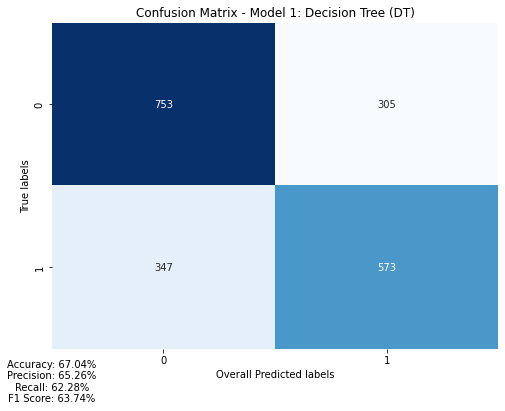

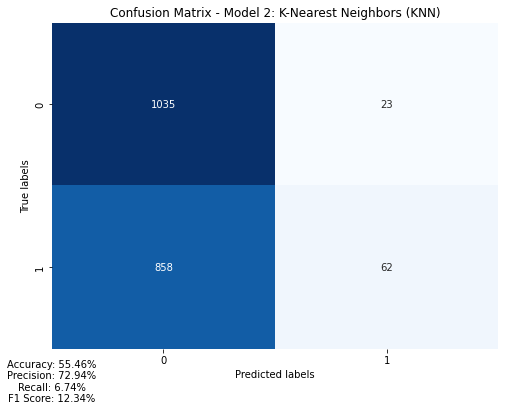

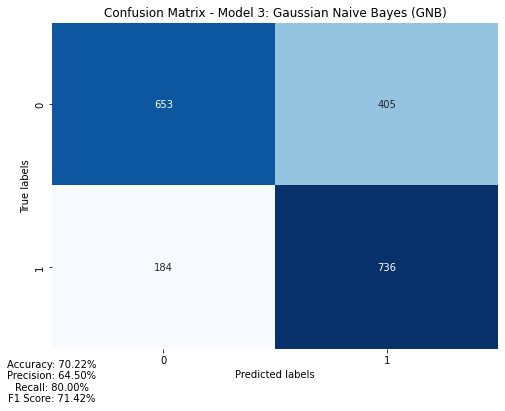

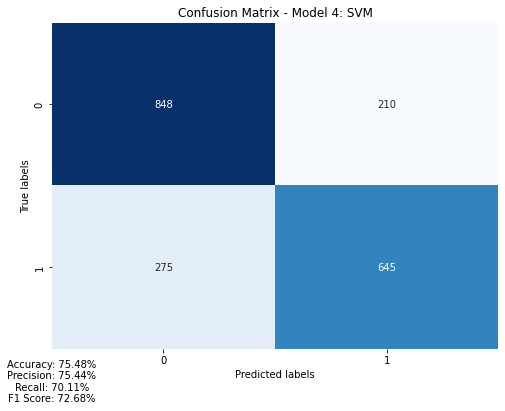

In [19]:
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# Model 1: Decision Tree Classifier
accuracy_1 = accuracy_score(y_holdout, holdout_pred_1)
precision_1 = precision_score(y_holdout, holdout_pred_1)
recall_1 = recall_score(y_holdout, holdout_pred_1)
F1Score_1 = f1_score(y_holdout, holdout_pred_1)

conf_matrix_1 = confusion_matrix(y_holdout, holdout_pred_1)

# Convert scores to percentages
accuracy_1_percent = accuracy_1 * 100
precision_1_percent = precision_1 * 100
recall_1_percent = recall_1 * 100
F1Score_1_percent = F1Score_1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Overall Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Model 1: Decision Tree (DT)')
plt.text(0, -0.1, f'Accuracy: {accuracy_1_percent:.2f}%\nPrecision: {precision_1_percent:.2f}%\nRecall: {recall_1_percent:.2f}%\nF1 Score: {F1Score_1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()


#------------------------------------------------------------------------------------------------------------------------------------#

# Model 2: K-Nearest Neighbors Classifier
accuracy_2 = accuracy_score(y_holdout, holdout_pred_2)
precision_2 = precision_score(y_holdout, holdout_pred_2)
recall_2 = recall_score(y_holdout, holdout_pred_2)
F1Score_2 = f1_score(y_holdout, holdout_pred_2)

conf_matrix_2 = confusion_matrix(y_holdout, holdout_pred_2)
# Convert scores to percentages
accuracy_2_percent = accuracy_2 * 100
precision_2_percent = precision_2 * 100
recall_2_percent = recall_2 * 100
F1Score_2_percent = F1Score_2 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Model 2: K-Nearest Neighbors (KNN)')
plt.text(0, -0.1, f'Accuracy: {accuracy_2_percent:.2f}%\nPrecision: {precision_2_percent:.2f}%\nRecall: {recall_2_percent:.2f}%\nF1 Score: {F1Score_2_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------#
# Model 3: Gaussian Naive Bayes Classifier
accuracy_3 = accuracy_score(y_holdout, holdout_pred_3)
precision_3 = precision_score(y_holdout, holdout_pred_3)
recall_3 = recall_score(y_holdout, holdout_pred_3)
F1Score_3 = f1_score(y_holdout, holdout_pred_3)

conf_matrix_3 = confusion_matrix(y_holdout, holdout_pred_3)

# Convert scores to percentages
accuracy_3_percent = accuracy_3 * 100
precision_3_percent = precision_3 * 100
recall_3_percent = recall_3 * 100
F1Score_3_percent = F1Score_3 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Model 3: Gaussian Naive Bayes (GNB)')
plt.text(0, -0.1, f'Accuracy: {accuracy_3_percent:.2f}%\nPrecision: {precision_3_percent:.2f}%\nRecall: {recall_3_percent:.2f}%\nF1 Score: {F1Score_3_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------#

# Model 4: Support Vector Machine (SVM) Classifier
accuracy_4 = accuracy_score(y_holdout, holdout_pred_4)
precision_4 = precision_score(y_holdout, holdout_pred_4)
recall_4 = recall_score(y_holdout, holdout_pred_4)
F1Score_4 = f1_score(y_holdout, holdout_pred_4)
conf_matrix_4 = confusion_matrix(y_holdout, holdout_pred_4)

# Convert scores to percentages
accuracy_4_percent = accuracy_4 * 100
precision_4_percent = precision_4 * 100
recall_4_percent = recall_4 * 100
F1Score_4_percent = F1Score_4 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Model 4: SVM')
plt.text(0, -0.1, f'Accuracy: {accuracy_4_percent:.2f}%\nPrecision: {precision_4_percent:.2f}%\nRecall: {recall_4_percent:.2f}%\nF1 Score: {F1Score_4_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------------#


***

# Metamodel

***

In [20]:
X_val.reset_index(drop=True, inplace=True)
pd.DataFrame(holdout_pred_1).reset_index(drop=True, inplace=True)
pd.DataFrame(holdout_pred_2).reset_index(drop=True, inplace=True)
pd.DataFrame(holdout_pred_3).reset_index(drop=True, inplace=True)
pd.DataFrame(holdout_pred_4).reset_index(drop=True, inplace=True)

X_blend_val = pd.concat([X_val, pd.DataFrame(holdout_pred_1), pd.DataFrame(holdout_pred_2), pd.DataFrame(holdout_pred_3), pd.DataFrame(holdout_pred_4)], axis=1)

X_test.reset_index(drop=True, inplace=True)
pd.DataFrame(test_pred_1).reset_index(drop=True, inplace=True)
pd.DataFrame(test_pred_2).reset_index(drop=True, inplace=True)
pd.DataFrame(test_pred_3).reset_index(drop=True, inplace=True)
pd.DataFrame(test_pred_4).reset_index(drop=True, inplace=True)

X_blend_test = pd.concat([X_test, pd.DataFrame(test_pred_1), pd.DataFrame(test_pred_2), pd.DataFrame(test_pred_3), pd.DataFrame(test_pred_4)], axis=1)

In [21]:
#same ^^^^^ 
# X_blend_val = pd.concat([holdout_pred_1, holdout_pred_2, holdout_pred_3, holdout_pred_4, holdout_pred_5], axis=1)
# X_blend_test = pd.concat([test_pred_1, test_pred_2, test_pred_3, test_pred_4, test_pred_5], axis=1)
X_blend_test

,aa,aahon,aalis,aangat,aaralan,aatras,aayusin,aba,abad,abandoned,...,zapanta,zebra,zero,zimmerman,zoned,zzz,0,0,0,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
5648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
5649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
5650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [22]:
# LR metamodel
lr = LogisticRegression()
param_grid_lr = {
    'max_iter': [100,500],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'C': [1, 10,0.1, 0.001, 0.0001],
}

# For Logistic Regression
lr_cv = GridSearchCV(lr, param_grid_lr, cv=3, n_jobs=n_jobs, scoring='accuracy')


# Record start time before fitting
start_time = time.time()
lr_cv.fit(X_blend_val, y_holdout)

meta_model = lr_cv.best_estimator_

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print fitting time
print(f"LR fitting time: {elapsed_time:.2f} seconds")

print("Logistic Regression - Best Parameters:", lr_cv.best_params_)
# Fit the meta-model on the validation predictions
#meta_model.fit(X_blend_val, y_holdout)

# Make predictions using the meta-model on the test predictions
blend_pred = meta_model.predict(X_blend_test)

LR fitting time: 83.80 seconds
Logistic Regression - Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'sag'}


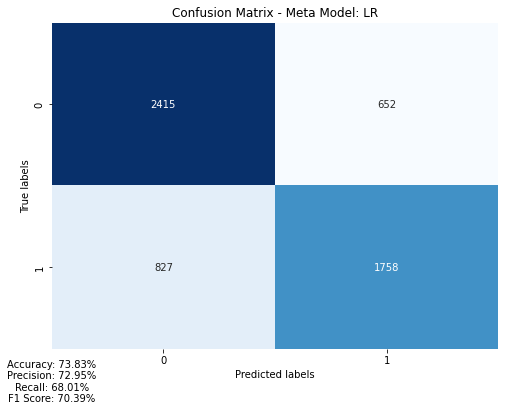

In [23]:
conf_matrix_blend = confusion_matrix(y_test, blend_pred)
blend_accuracy = accuracy_score(y_test, blend_pred)
blend_precision = precision_score(y_test, blend_pred)
blend_recall = recall_score(y_test, blend_pred)
blend_f1 = f1_score(y_test, blend_pred)

# Calculate percentages
blend_accuracy_percent = blend_accuracy * 100
blend_precision_percent = blend_precision * 100
blend_recall_percent = blend_recall * 100
blend_f1_percent = blend_f1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_blend, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Meta Model: LR')
plt.text(0, -0.1, f'Accuracy: {blend_accuracy_percent:.2f}%\nPrecision: {blend_precision_percent:.2f}%\nRecall: {blend_recall_percent:.2f}%\nF1 Score: {blend_f1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()
plt.show()

In [24]:
# Get the cross-validation results from GridSearchCV for Logistic Regression
results_lr = lr_cv.cv_results_

# Extract the mean test scores and parameters
mean_test_scores_lr = results_lr['mean_test_score']
params_lr = results_lr['params']

# Combine mean test scores and parameters into tuples
score_param_pairs = list(zip(mean_test_scores_lr, params_lr))

# Sort the list of tuples based on mean test scores in descending order
score_param_pairs_sorted = sorted(score_param_pairs, key=lambda x: x[0], reverse=True)

# Select the top N performers (you can adjust N as needed)
top_performers = score_param_pairs_sorted[:15]

# Print out the top performers
for mean_test_score, params in top_performers:
    print(f'Mean test score for hyperparameters {params}:\n{mean_test_score}\n')

Mean test score for hyperparameters {'C': 10, 'max_iter': 100, 'solver': 'sag'}:
0.7527842920862647

Mean test score for hyperparameters {'C': 10, 'max_iter': 100, 'solver': 'saga'}:
0.7527842920862647

Mean test score for hyperparameters {'C': 10, 'max_iter': 500, 'solver': 'sag'}:
0.7527842920862647

Mean test score for hyperparameters {'C': 10, 'max_iter': 500, 'solver': 'saga'}:
0.7527842920862647

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}:
0.7527819929185634

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}:
0.7527819929185634

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 100, 'solver': 'sag'}:
0.7527819929185634

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}:
0.7527819929185634

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 500, 'solver': 'newton-cg'}:
0.7527819929185634

Mean test score for hyperparameters {'C': 0.1, 'max_iter': 500, 'solv

# Base Models Classification on the Test Set

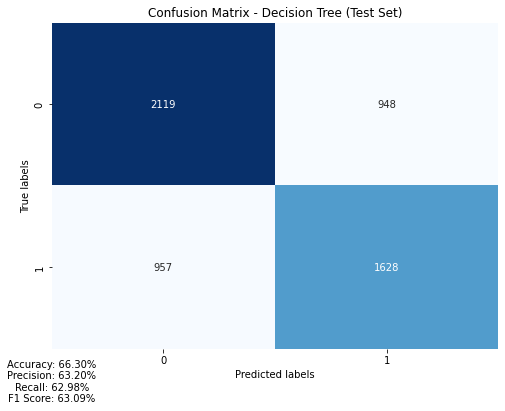

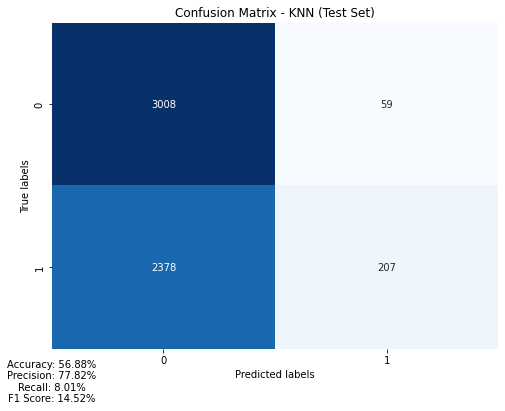

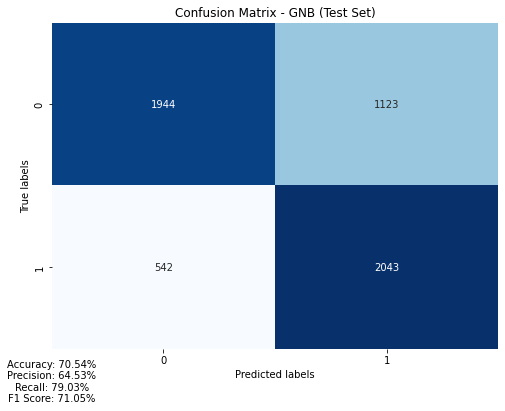

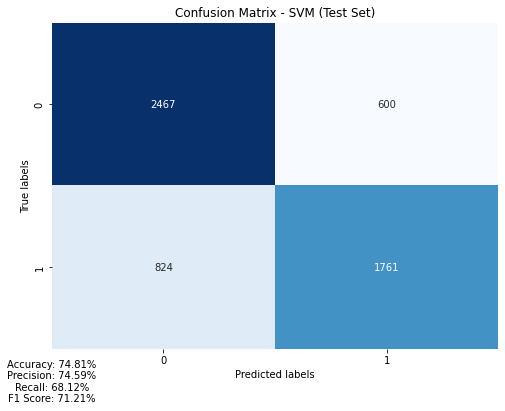

In [25]:
#DT: Test Set Results
dt_accuracy = accuracy_score(y_test, test_pred_1)
dt_precision = precision_score(y_test, test_pred_1)
dt_recall = recall_score(y_test, test_pred_1)
dt_f1 = f1_score(y_test, test_pred_1)

conf_matrix_dt_test = confusion_matrix(y_test, test_pred_1)

# Calculate percentages
dt_accuracy_percent = dt_accuracy * 100
dt_precision_percent = dt_precision * 100
dt_recall_percent = dt_recall * 100
dt_f1_percent = dt_f1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_test, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree (Test Set)')
plt.text(0, -0.1, f'Accuracy: {dt_accuracy_percent:.2f}%\nPrecision: {dt_precision_percent:.2f}%\nRecall: {dt_recall_percent:.2f}%\nF1 Score: {dt_f1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------#
#KNN: Test Set Results
knn_accuracy = accuracy_score(y_test, test_pred_2)
knn_precision = precision_score(y_test, test_pred_2)
knn_recall = recall_score(y_test, test_pred_2)
knn_f1 = f1_score(y_test, test_pred_2)

conf_matrix_knn_test = confusion_matrix(y_test, test_pred_2)

# Calculate percentages
knn_accuracy_percent = knn_accuracy * 100
knn_precision_percent = knn_precision * 100
knn_recall_percent = knn_recall * 100
knn_f1_percent = knn_f1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_test, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN (Test Set)')
plt.text(0, -0.1, f'Accuracy: {knn_accuracy_percent:.2f}%\nPrecision: {knn_precision_percent:.2f}%\nRecall: {knn_recall_percent:.2f}%\nF1 Score: {knn_f1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------#
#GNB: Test Set Results
gnb_accuracy = accuracy_score(y_test, test_pred_3)
gnb_precision = precision_score(y_test, test_pred_3)
gnb_recall = recall_score(y_test, test_pred_3)
gnb_f1 = f1_score(y_test, test_pred_3)

conf_matrix_gnb_test = confusion_matrix(y_test, test_pred_3)

# Calculate percentages
gnb_accuracy_percent = gnb_accuracy * 100
gnb_precision_percent = gnb_precision * 100
gnb_recall_percent = gnb_recall * 100
gnb_f1_percent = gnb_f1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb_test, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - GNB (Test Set)')
plt.text(0, -0.1, f'Accuracy: {gnb_accuracy_percent:.2f}%\nPrecision: {gnb_precision_percent:.2f}%\nRecall: {gnb_recall_percent:.2f}%\nF1 Score: {gnb_f1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------#
#SVM: Test Set Results
svm_accuracy = accuracy_score(y_test, test_pred_4)
svm_precision = precision_score(y_test, test_pred_4)
svm_recall = recall_score(y_test, test_pred_4)
svm_f1 = f1_score(y_test, test_pred_4)

conf_matrix_svm_test = confusion_matrix(y_test, test_pred_4)

# Calculate percentages
svm_accuracy_percent = svm_accuracy * 100
svm_precision_percent = svm_precision * 100
svm_recall_percent = svm_recall * 100
svm_f1_percent = svm_f1 * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_test, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM (Test Set)')
plt.text(0, -0.1, f'Accuracy: {svm_accuracy_percent:.2f}%\nPrecision: {svm_precision_percent:.2f}%\nRecall: {svm_recall_percent:.2f}%\nF1 Score: {svm_f1_percent:.2f}%', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()
#conf_matrix_svm_test = confusion_matrix(y_test, test_pred_4)

# Holdout Prediction Export

In [26]:
y_holdout
y_holdout_df = y_holdout.reset_index(name='true label')
holdout_pred_1_df = pd.DataFrame(holdout_pred_1)
holdout_pred_2_df = pd.DataFrame(holdout_pred_2)
holdout_pred_3_df = pd.DataFrame(holdout_pred_3)
holdout_pred_4_df = pd.DataFrame(holdout_pred_4)

combined_holdout_df = pd.concat([y_holdout_df, holdout_pred_1_df.rename(columns={0: 'dt prediction'}), holdout_pred_2_df.rename(columns={0: 'knn prediction'}), holdout_pred_3_df.rename(columns={0: 'gnb prediction'}), holdout_pred_4_df.rename(columns={0: 'svm prediction'})], axis=1)
combined_holdout_df.to_csv('holdout_predictions.csv')
combined_holdout_df

,index,true label,dt prediction,knn prediction,gnb prediction,svm prediction
0,13521,0,1,0,1,1
1,11273,1,1,0,0,0
2,9713,0,0,0,0,0
3,16018,1,1,0,1,0
4,11647,0,1,0,1,0
...,...,...,...,...,...,...
1973,16424,0,0,0,1,0
1974,5850,1,0,0,1,0
1975,18829,1,0,0,1,1
1976,18582,0,0,0,0,0


# Test Set Prediction Export

In [27]:
y_test_df = y_test.reset_index(name='true label')

test_pred_1_df = pd.DataFrame(test_pred_1)
test_pred_2_df = pd.DataFrame(test_pred_2)
test_pred_3_df = pd.DataFrame(test_pred_3)
test_pred_4_df = pd.DataFrame(test_pred_4)
blend_pred_df = pd.DataFrame(blend_pred)

combined_test_df = pd.concat([y_test_df, test_pred_1_df.rename(columns={0: 'dt prediction'}), test_pred_2_df.rename(columns={0: 'knn prediction'}), test_pred_3_df.rename(columns={0: 'gnb prediction'}), test_pred_4_df.rename(columns={0: 'svm prediction'}), blend_pred_df.rename(columns={0: 'lr prediction'}), ], axis=1)
combined_test_df.to_csv('test_predictions.csv')
combined_test_df

,index,true label,dt prediction,knn prediction,gnb prediction,svm prediction,lr prediction
0,18173,0,0,0,0,0,0
1,751,0,1,0,1,1,1
2,3835,1,1,0,1,0,0
3,6214,1,1,0,1,1,1
4,6708,1,1,1,1,1,1
...,...,...,...,...,...,...,...
5647,5005,0,0,0,0,0,0
5648,14200,0,0,0,0,0,0
5649,10907,0,0,0,1,0,0
5650,13522,0,0,0,0,0,0


In [28]:
# PANG EXPORT TRAINED MODEL (DONT DELETE)


 joblib.dump(model_1, "DT.pkl")
 joblib.dump(model_2, "KNN.pkl")
 joblib.dump(model_3, "GNB.pkl")
 joblib.dump(model_4, "SVM.pkl")
 joblib.dump(meta_model, "LR-metamodel.pkl")
 joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

*** 

# GUI Reminder: add the functionalities such as preprocess, word char, word minimum

*** 

In [29]:
# VERy latest with base model result
import tkinter as tk
from tkinter import Text, Button, Label, messagebox
import pandas as pd

def classify_text():
    input_text = text_input.get("1.0", "end-1c")
    if input_text:
        # TF-IDF Vectorization for the input text
        input_tfidf = tfidf_vectorizer.transform([input_text])
        input_df = pd.DataFrame(input_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
        
        # Make predictions using base models
        input_pred_1 = model_1.predict(input_df)
        input_pred_2 = model_2.predict(input_df)
        input_pred_3 = model_3.predict(input_df)
        input_pred_4 = model_4.predict(input_df)
        
        # Display predictions of base models
        base_model_results = f"DT: {'Hate' if input_pred_1[0] else 'Not Hate'}\n" + \
                             f"KNN: {'Hate' if input_pred_2[0] else 'Not Hate'}\n" + \
                             f"GNB: {'Hate' if input_pred_3[0] else 'Not Hate'}\n" + \
                             f"SVM: {'Hate' if input_pred_4[0] else 'Not Hate'}\n"
        result_label.config(text=base_model_results)
        
        # Create blended features for input text
        input_blend = pd.DataFrame({'Model 1': input_pred_1, 'Model 2': input_pred_2,
                                    'Model 3': input_pred_3, 'Model 4': input_pred_4})
        
        # Make predictions using the meta-model
        meta_pred = meta_model.predict(input_blend.values)
        
        # Display final classification result
        final_result = f"Ensemble result : {'Hate' if meta_pred[0] else 'Not Hate'}"
        result_label.config(text=result_label.cget("text") + "\n\n" + final_result)
        
    else:
        messagebox.showwarning("Warning", "Please enter text for analysis")

# Your models and tfidf_vectorizer should be defined before this code

# Create GUI window
root = tk.Tk()
root.title("Hate Classification GUI")

# Text Input
text_input_label = Label(root, text="Enter Text:")
text_input_label.pack()
text_input = Text(root, height=5, width=40)
text_input.pack()

# Analyze Button
analyze_button = Button(root, text="Analyze", command=classify_text)
analyze_button.pack()

# Result Label
result_label = Label(root, text="Base Model Predictions:")
result_label.pack()

# Run the GUI
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.values)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 4 features per sample; expecting 7206
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.val

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.values)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 4 features per sample; expecting 7206
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.val

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.values)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 4 features per sample; expecting 7206
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.val

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.values)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\site-packages\sklearn\linear_model\_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 4 features per sample; expecting 7206
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\venvthesis\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-29-e8882bd5e8c3>", line 31, in classify_text
    meta_pred = meta_model.predict(input_blend.val

In [30]:
# #old gui with base model result

# def classify_text():
#     input_text = text_input.get("1.0", "end-1c")
#     if input_text:
#         # TF-IDF Vectorization for the input text

       
#         input_tfidf = tfidf_vectorizer.transform([input_text])
#         input_df = pd.DataFrame(input_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
#         # Make predictions using base models

#         input_pred_1 = model_1.predict(input_df)
#         input_pred_2 = model_2.predict(input_df)
#         input_pred_3 = model_3.predict(input_df)
#         input_pred_4 = model_4.predict(input_df)
        

#         # Create blended features for input text
#         input_blend = pd.DataFrame({'Model 1': input_pred_1, 'Model 2': input_pred_2,
#                                     'Model 3': input_pred_3, 'Model 4': input_pred_4,})

#         # Make predictions using the meta-model
#         meta_pred = meta_model.predict(input_blend.values)
#         #probability_hate = meta_model.predict_proba(input_blend)[:, 1][0]

#         # Display result and probability
#         result_label.config(text=f"Classification Result: {'Hate' if meta_pred[0] else 'Not Hate'}")
        
#         #probability_label.config(text=f"Probability of Hate: {probability_hate:.2%}")
#     else:
#         messagebox.showwarning("Warning", "Please enter text for analysis")

# # Create GUI window
# root = tk.Tk()
# root.title("Hate Classification GUI")

# # Text Input
# text_input_label = Label(root, text="Enter Text:")
# text_input_label.pack()
# text_input = Text(root, height=5, width=40)
# text_input.pack()

# # Analyze Button
# analyze_button = Button(root, text="Analyze", command=classify_text)
# analyze_button.pack()

# # Result Label
# result_label = Label(root, text="Classification Result: ")
# result_label.pack()

# # Probability Label
# # probability_label = Label(root, text="Probability of Hate: ")
# # probability_label.pack()

# # Run the GUI
# root.mainloop()

In [31]:
# just random shit experii
#from sklearn.model_selection import GridSearchCV

## For DecisionTreeClassifier
#param_grid_dt = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 15, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

## For KNeighborsClassifier
#param_grid_knn = {
#    'n_neighbors': [3, 5, 7, 9],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan']
#}

## For SVC
#param_grid_svc = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#}

## For DecisionTreeClassifier
#grid_search_dt = GridSearchCV(model_1, param_grid_dt, cv=5)
#grid_search_dt.fit(X_train, y_train)

## For KNeighborsClassifier
#grid_search_knn = GridSearchCV(model_2, param_grid_knn, cv=5)
#grid_search_knn.fit(X_train, y_train)

## For SVC
#grid_search_svc = GridSearchCV(model_4, param_grid_svc, cv=5)
#grid_search_svc.fit(X_train, y_train)

#best_dt = grid_search_dt.best_estimator_
#best_knn = grid_search_knn.best_estimator_
#best_svc = grid_search_svc.best_estimator_

#print("Decision Tree Classifier - Best Parameters:", grid_search_dt.best_params_)
#print("K Neighbors Classifier - Best Parameters:", grid_search_knn.best_params_)
#print("Support Vector Classifier - Best Parameters:", grid_search_svc.best_params_)

## Evaluate best models
#accuracy_dt = best_dt.score(X_test, y_test)
#accuracy_knn = best_knn.score(X_test, y_test)
#accuracy_svc = best_svc.score(X_test, y_test)

#print("Decision Tree Classifier - Test Accuracy:", accuracy_dt)
#print("K Neighbors Classifier - Test Accuracy:", accuracy_knn)
#print("Support Vector Classifier - Test Accuracy:", accuracy_svc)

In [32]:
#DONT MIND !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# import tkinter as tk
# from tkinter import Text, Button, Label, messagebox
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Download stopwords data
# nltk.download('stopwords')
# nltk.download('punkt')

# # Define English stopwords
# stop_words = set(stopwords.words('english'))

# def classify_text():
#     input_text = text_input.get("1.0", "end-1c")
#     if input_text:
#         # Tokenize input text
#         word_tokens = word_tokenize(input_text.lower())
        
#         # Remove stopwords from input text
#         filtered_text = [word for word in word_tokens if word not in stop_words]

#         # Join filtered words back into a string
#         filtered_text = ' '.join(filtered_text)
        
#         # TF-IDF Vectorization for the filtered text
#         input_tfidf = tfidf_vectorizer.transform([filtered_text])
#         input_df = pd.DataFrame(input_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        
#         # Make predictions using base models
#         input_pred_1 = model_1.predict(input_df)
#         input_pred_2 = model_2.predict(input_df)
#         input_pred_3 = model_3.predict(input_df)
#         input_pred_4 = model_4.predict(input_df)
        
#         # Display predictions of base models
#         base_model_results = f"DT: {'Hate' if input_pred_1[0] else 'Not Hate'}\n" + \
#                              f"KNN: {'Hate' if input_pred_2[0] else 'Not Hate'}\n" + \
#                              f"GNB: {'Hate' if input_pred_3[0] else 'Not Hate'}\n" + \
#                              f"SVM: {'Hate' if input_pred_4[0] else 'Not Hate'}\n"
#         result_label.config(text=base_model_results)
        
#         # Create blended features for input text
#         input_blend = pd.DataFrame({'Model 1': input_pred_1, 'Model 2': input_pred_2,
#                                     'Model 3': input_pred_3, 'Model 4': input_pred_4})
        
#         # Make predictions using the meta-model
#         meta_pred = meta_model.predict(input_blend.values)
        
#         # Display final classification result
#         final_result = f"Ensemble result : {'Hate' if meta_pred[0] else 'Not Hate'}"
#         result_label.config(text=result_label.cget("text") + "\n\n" + final_result)
        
#     else:
#         messagebox.showwarning("Warning", "Please enter text for analysis")

# # Your models and tfidf_vectorizer should be defined before this code

# # Create GUI window
# root = tk.Tk()
# root.title("Hate Classification GUI")

# # Text Input
# text_input_label = Label(root, text="Enter Text:")
# text_input_label.pack()
# text_input = Text(root, height=5, width=40)
# text_input.pack()

# # Analyze Button
# analyze_button = Button(root, text="Analyze", command=classify_text)
# analyze_button.pack()

# # Result Label
# result_label = Label(root, text="Base Model Predictions:")
# result_label.pack()

# # Run the GUI
# root.mainloop()
